# Assignment Activity 1

In [1]:
# Import all the necessary packages.
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.stats.api as sms
import sklearn
import matplotlib.pyplot as plt

from sklearn import linear_model
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from statsmodels.formula.api import ols

import warnings  
warnings.filterwarnings('ignore')  

In [2]:
# Import the data set.
turtle_reviews = pd.read_csv('turtle_reviews.csv')

# View the DataFrame.
turtle_reviews.head()

,gender,age,remuneration (k£),spending_score (1-100),loyalty_points,education,language,platform,product,review,summary
0,Male,18,12.30,39,210,graduate,EN,Web,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,EN,Web,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,EN,Web,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,EN,Web,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,EN,Web,291,As my review of GF9's previous screens these w...,Money trap


In [3]:
# View the metadata.
turtle_reviews.info()

# Generate descriptive statistics summary
turtle_reviews.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gender                  2000 non-null   object 
 1   age                     2000 non-null   int64  
 2   remuneration (k£)       2000 non-null   float64
 3   spending_score (1-100)  2000 non-null   int64  
 4   loyalty_points          2000 non-null   int64  
 5   education               2000 non-null   object 
 6   language                2000 non-null   object 
 7   platform                2000 non-null   object 
 8   product                 2000 non-null   int64  
 9   review                  2000 non-null   object 
 10  summary                 2000 non-null   object 
dtypes: float64(1), int64(4), object(6)
memory usage: 172.0+ KB


,age,remuneration (k£),spending_score (1-100),loyalty_points,product
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,39.495000,48.079060,50.000000,1578.032000,4320.521500
std,13.573212,23.123984,26.094702,1283.239705,3148.938839
min,17.000000,12.300000,1.000000,25.000000,107.000000
25%,29.000000,30.340000,32.000000,772.000000,1589.250000
50%,38.000000,47.150000,50.000000,1276.000000,3624.000000
75%,49.000000,63.960000,73.000000,1751.250000,6654.000000
max,72.000000,112.340000,99.000000,6847.000000,11086.000000


In [4]:
# Check for missing values
missing_values = turtle_reviews.isnull().sum()
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 gender                    0
age                       0
remuneration (k£)         0
spending_score (1-100)    0
loyalty_points            0
education                 0
language                  0
platform                  0
product                   0
review                    0
summary                   0
dtype: int64


In [5]:
# Check column names before dropping
print(turtle_reviews.columns.tolist())  # View list of columns

['gender', 'age', 'remuneration (k£)', 'spending_score (1-100)', 'loyalty_points', 'education', 'language', 'platform', 'product', 'review', 'summary']


In [6]:
# Remove redundant columns
turtle_reviews.drop(columns=['language', 'platform'], inplace=True)

In [7]:
# Rename columns
turtle_reviews.rename(columns={
    'remuneration (k£)': 'remuneration',
    'spending_score (1-100)': 'spending_score'
}, inplace=True)

# Save the cleaned DataFrame as a new CSV file in the current directory
cleaned_file_path = 'cleaned_turtle_reviews.csv'
turtle_reviews.to_csv(cleaned_file_path, index=False)
cleaned_reviews = pd.read_csv(cleaned_file_path)

In [8]:
cleaned_info = cleaned_reviews.info()
cleaned_head = cleaned_reviews.head()
print(cleaned_info)
print(cleaned_head)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          2000 non-null   object 
 1   age             2000 non-null   int64  
 2   remuneration    2000 non-null   float64
 3   spending_score  2000 non-null   int64  
 4   loyalty_points  2000 non-null   int64  
 5   education       2000 non-null   object 
 6   product         2000 non-null   int64  
 7   review          2000 non-null   object 
 8   summary         2000 non-null   object 
dtypes: float64(1), int64(4), object(4)
memory usage: 140.8+ KB
None
   gender  age  remuneration  spending_score  loyalty_points education  \
0    Male   18         12.30              39             210  graduate   
1    Male   23         12.30              81             524  graduate   
2  Female   22         13.12               6              40  graduate   
3  Female   25         13.12      

R-squared:  0.0018015480437203468
Intercept:  1736.517739399063
coefficients:  [-4.01280515]


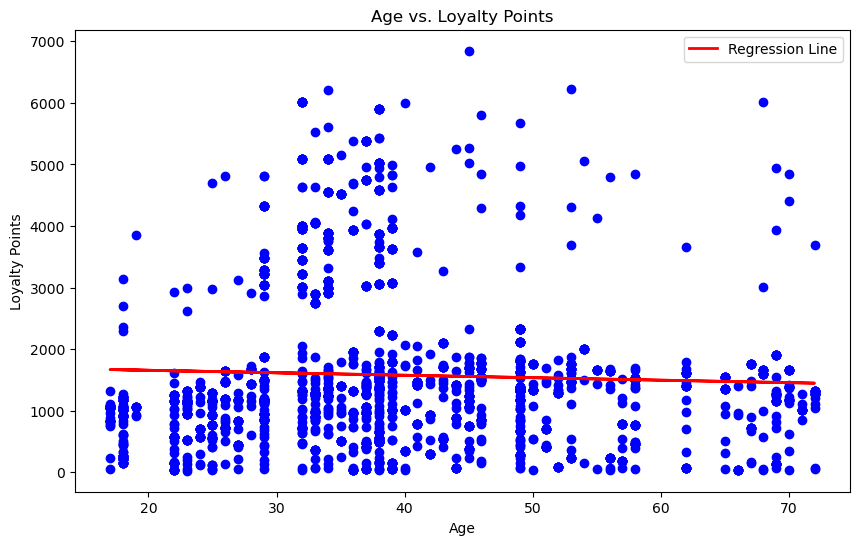

In [9]:
# Define the independent variables (age) and the dependent variable (loyalty_points)
X_age = cleaned_reviews[['age']]
y = cleaned_reviews['loyalty_points']


# Create the linear regression model
model = LinearRegression()
model.fit(cleaned_reviews[['age']], y)

# Call the predictions for X (array).
y_pred_age = model.predict(X_age)

# Extract the estimated parameters, standard errors, and predicted values
print("R-squared: ", model.score(X_age,y)) 
print("Intercept: ", model.intercept_)
print("coefficients: ", model.coef_)

# Plotting age vs. loyalty_points
plt.figure(figsize=(10, 6))
plt.scatter(cleaned_reviews['age'], y, color='blue')
plt.plot(cleaned_reviews['age'], y_pred_age, color='red', linewidth=2, label='Regression Line')
plt.title('Age vs. Loyalty Points')
plt.xlabel('Age')
plt.ylabel('Loyalty Points')
plt.legend()
plt.show()

R-squared:  0.3795357732793634
Intercept:  -65.68651279500409
coefficients:  [34.18782549]


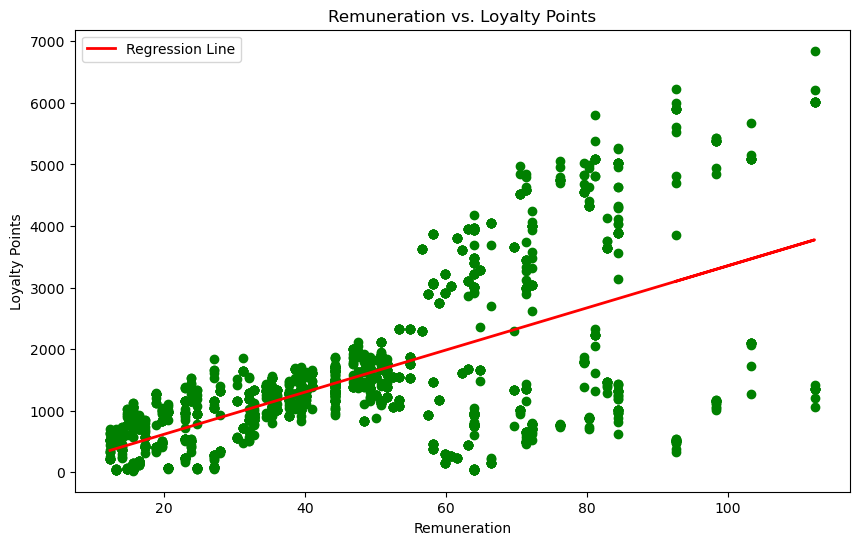

In [10]:
# Define the independent variables (remuneration) and the dependent variable (loyalty_points)
X_remuneration = cleaned_reviews[['remuneration']]
y = cleaned_reviews['loyalty_points']


# Create the linear regression model
model = LinearRegression()
model.fit(cleaned_reviews[['remuneration']], y)

# Call the predictions for X (array).
y_pred_remuneration = model.predict(X_remuneration)

# Extract the estimated parameters, standard errors, and predicted values
print("R-squared: ", model.score(X_remuneration,y)) 
print("Intercept: ", model.intercept_)
print("coefficients: ", model.coef_)

# Plotting remuneration vs. loyalty_points
plt.figure(figsize=(10, 6))
plt.scatter(cleaned_reviews['remuneration'], y, color='green')
plt.plot(cleaned_reviews['remuneration'], y_pred_remuneration, color='red', linewidth=2, label='Regression Line')
plt.title('Remuneration vs. Loyalty Points')
plt.xlabel('Remuneration')
plt.ylabel('Loyalty Points')
plt.legend()
plt.show()


R-squared:  0.4520008865838909
Intercept:  -75.05266293364707
coefficients:  [33.06169326]


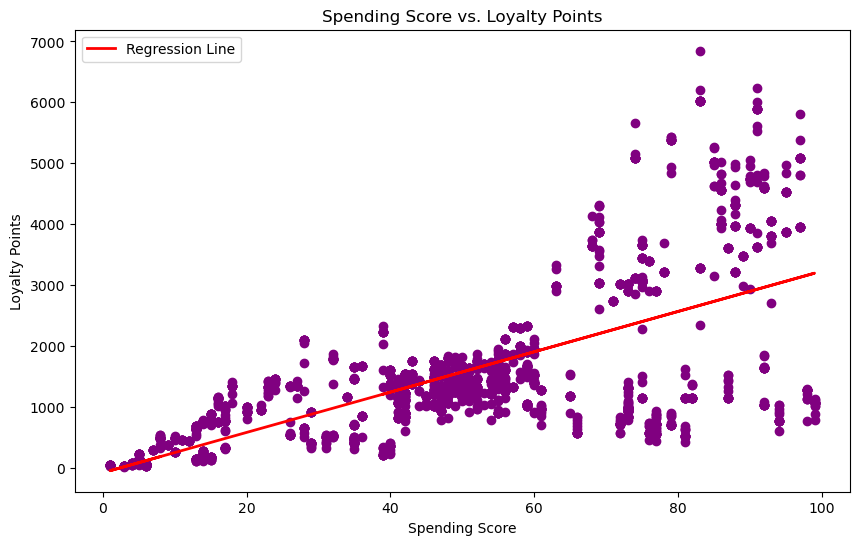

In [11]:
# Define the independent variables (spending_score) and the dependent variable (loyalty_points)
X_spending_score = cleaned_reviews[['spending_score']]
y = cleaned_reviews['loyalty_points']


# Create the linear regression model
model = LinearRegression()
model.fit(cleaned_reviews[['spending_score']], y)

# Call the predictions for X (array).
y_pred_spending_score = model.predict(X_spending_score)

# Extract the estimated parameters, standard errors, and predicted values
print("R-squared: ", model.score(X_spending_score,y)) 
print("Intercept: ", model.intercept_)
print("coefficients: ", model.coef_)

# Plotting spending_score vs. loyalty_points
plt.figure(figsize=(10, 6))
plt.scatter(cleaned_reviews['spending_score'], y, color='purple')
plt.plot(cleaned_reviews['spending_score'], y_pred_spending_score, color='red', linewidth=2, label='Regression Line')
plt.title('Spending Score vs. Loyalty Points')
plt.xlabel('Spending Score')
plt.ylabel('Loyalty Points')
plt.legend()
plt.show()

# Assignment activity 2

Mean Squared Error: 6390.448333333334
Root Mean Squared Error: 79.94027979268857
Mean Absolute Error: 26.171666666666667
R-squared: 0.9960547843086969


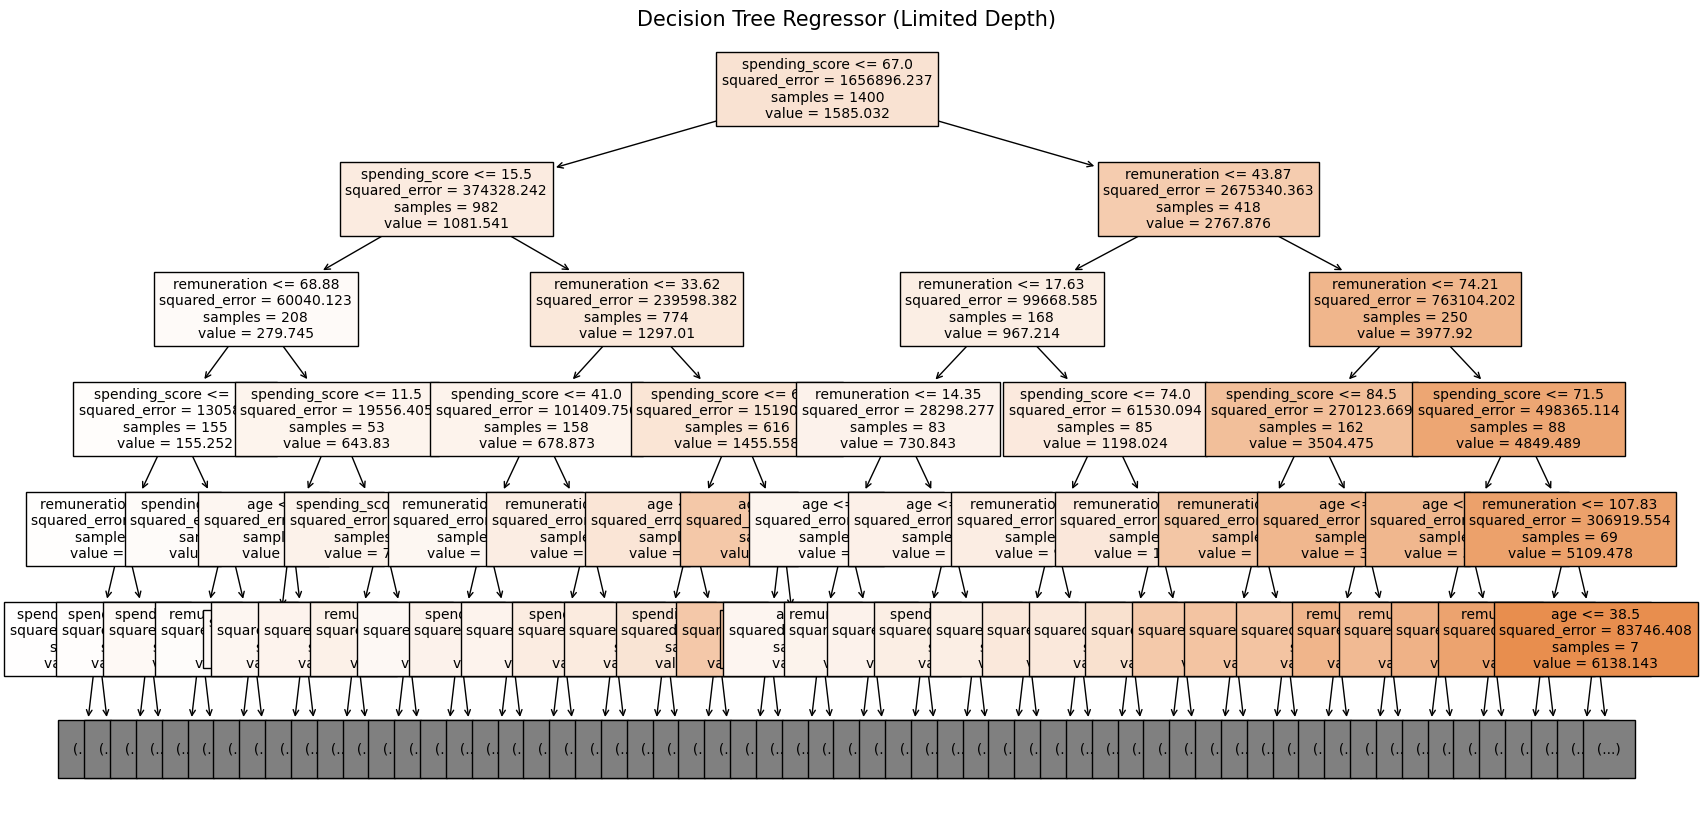

In [39]:
## Import necessary libraries and prepare the data
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

# Load the CSV file
turtle_reviews = pd.read_csv('turtle_reviews.csv')

# Rename columns
turtle_reviews.rename(columns={
    'remuneration (k£)': 'remuneration',
    'spending_score (1-100)': 'spending_score'
}, inplace=True)


# Example: Ensuring specific columns are present
# If your dataset does not have these exact columns, adjust accordingly
required_columns = ['age', 'spending_score', 'remuneration', 'loyalty_points', 'gender']
for col in required_columns:
    if col not in turtle_reviews.columns:
        raise ValueError(f"Missing required column: {col}")

# Clean and prepare the data
turtle_reviews['gender'] = turtle_reviews['gender'].replace({'Female': 'F', 'Male': 'M'})
df2 = turtle_reviews.copy()

# Check for categorical variables and apply One-Hot Encoding
# Identify categorical columns
categorical_cols = df2.select_dtypes(include=['object']).columns

# Apply one-hot encoding to categorical columns
encoder = OneHotEncoder(sparse=False, drop='first')
encoded_features = encoder.fit_transform(df2[categorical_cols])

# Convert encoded features into a DataFrame
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(categorical_cols))

# Drop original categorical columns and concatenate the encoded columns
df2 = df2.drop(categorical_cols, axis=1)
df2 = pd.concat([df2.reset_index(drop=True), encoded_df.reset_index(drop=True)], axis=1)

# Specify the target variable (Y) and exclude it from input data
X = df2.drop('loyalty_points', axis=1)  # Independent variables
y = df2['loyalty_points']  # Dependent variable

# Focus on specific features: age, spending_score, and remuneration
X = df2[['age', 'spending_score', 'remuneration']]

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Import the DecisionTreeRegressor class and create a regressor variable
regressor = DecisionTreeRegressor(random_state=42)

# Fit the regressor object to the dataset
regressor.fit(X_train, y_train)

# Predict using the test data
y_test_predicted = regressor.predict(X_test)

# Calculate regression metrics
mse = mean_squared_error(y_test, y_test_predicted)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_test_predicted)
r2 = r2_score(y_test, y_test_predicted)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)

# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(regressor, filled=True, feature_names=X.columns, fontsize=10, max_depth=5)
plt.title("Decision Tree Regressor (Limited Depth)", fontsize=15)
plt.show()

Pruned Mean Squared Error: 70229.10691738166
Pruned Root Mean Squared Error: 265.0077487874301
Pruned Mean Absolute Error: 177.2664367154586
Pruned R-squared: 0.9566432650505238


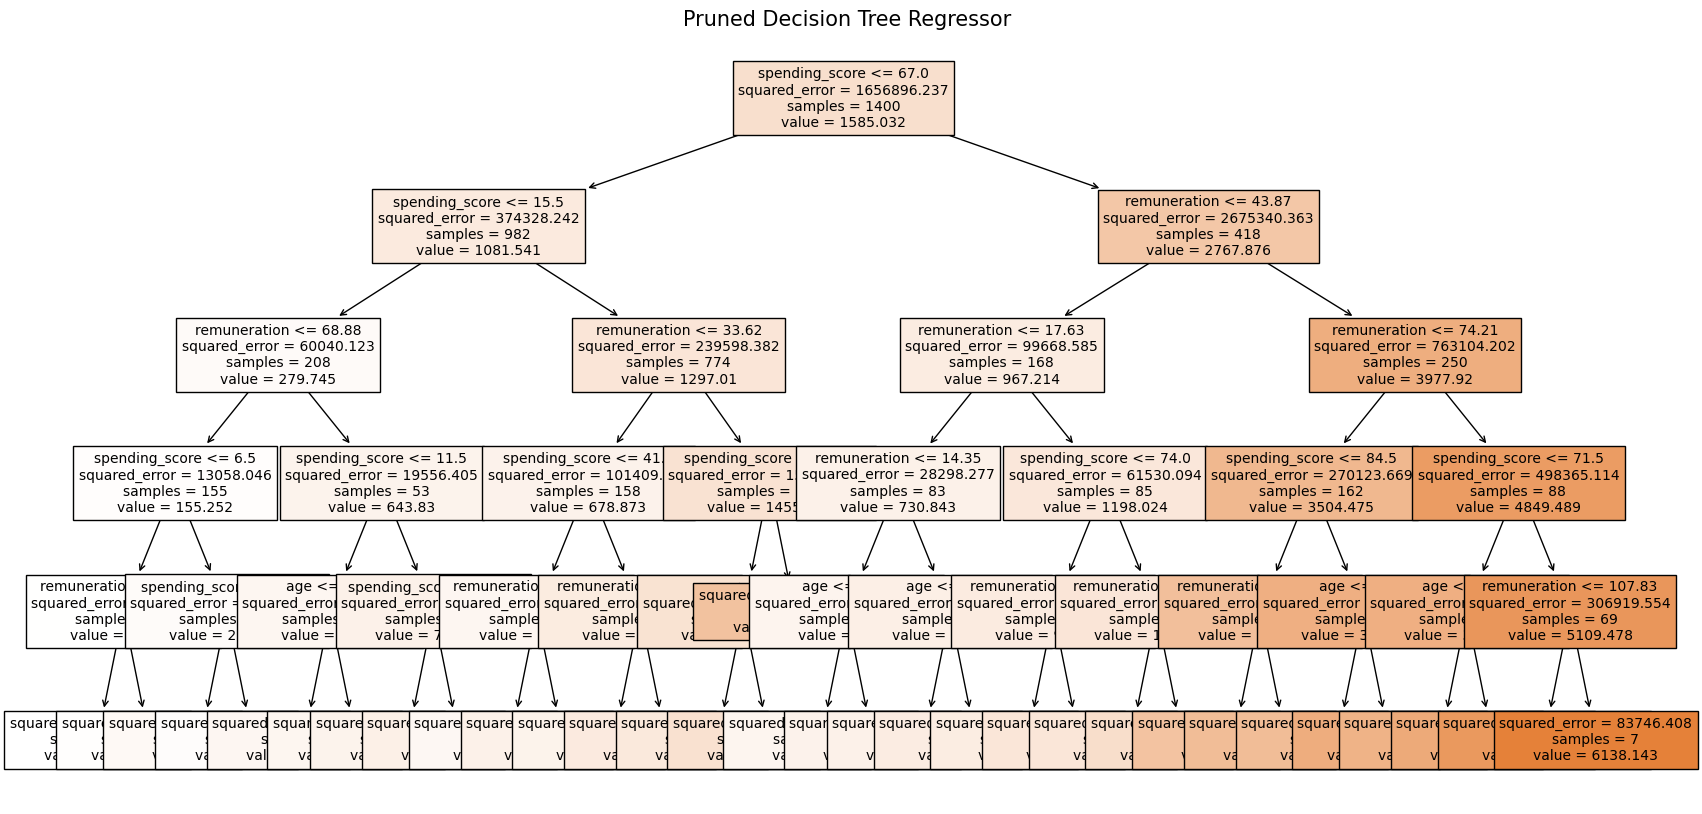

In [40]:
# Prune the tree and re-evaluate
regressor_pruned = DecisionTreeRegressor(random_state=42, max_depth=5, min_samples_split=5, min_samples_leaf=5)
regressor_pruned.fit(X_train, y_train)
y_test_predicted_pruned = regressor_pruned.predict(X_test)

# Evaluate the pruned model
mse_pruned = mean_squared_error(y_test, y_test_predicted_pruned)
rmse_pruned = np.sqrt(mse_pruned)
mae_pruned = mean_absolute_error(y_test, y_test_predicted_pruned)
r2_pruned = r2_score(y_test, y_test_predicted_pruned)

print("Pruned Mean Squared Error:", mse_pruned)
print("Pruned Root Mean Squared Error:", rmse_pruned)
print("Pruned Mean Absolute Error:", mae_pruned)
print("Pruned R-squared:", r2_pruned)

# Plot the pruned decision tree
plt.figure(figsize=(20, 10))
plot_tree(regressor_pruned, filled=True, feature_names=X.columns, fontsize=10)
plt.title("Pruned Decision Tree Regressor", fontsize=15)
plt.show()

In [17]:
# Import necessary libraries and prepare the data
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

turtle_reviews['gender'] = turtle_reviews['gender'].replace({'Female': 'F', 'Male': 'M'})

gender_counts = turtle_reviews['gender'].value_counts().reset_index()
gender_counts.columns = ['gender', 'count']
print(gender_counts)

  gender  count
0      F   1120
1      M    880


In [13]:
df2 = turtle_reviews.copy() 

# Check for categorical variables and apply One-Hot Encoding
# Identify categorical columns
categorical_cols = df2.select_dtypes(include=['object']).columns

# Apply one-hot encoding to categorical columns
encoder = OneHotEncoder(sparse=False, drop='first')
encoded_features = encoder.fit_transform(df2[categorical_cols])

# Convert encoded features into a DataFrame
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(categorical_cols))

# Drop original categorical columns and concatenate the encoded columns
df2 = df2.drop(categorical_cols, axis=1)
df2 = pd.concat([df2.reset_index(drop=True), encoded_df.reset_index(drop=True)], axis=1)

# Specify the target variable (Y) and exclude it from input data
X = df2.drop('loyalty_points', axis=1)  # Independent variables
y = df2['loyalty_points']  # Dependent variable

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Import the DecisionTreeRegressor class and create a regressor variable
from sklearn.tree import DecisionTreeRegressor

regressor = DecisionTreeRegressor(random_state=42)

# Fit the regressor object to the dataset
regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [18]:
# Predict using the training data
y_train_predicted = regressor.predict(X_train)

# Predict using the test data
y_test_predicted = regressor.predict(X_test)

In [19]:
# Calculate regression metrics
mse = mean_squared_error(y_test, y_test_predicted)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_test_predicted)
r2 = r2_score(y_test, y_test_predicted)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)

Mean Squared Error: 13309.085
Root Mean Squared Error: 115.36500769297422
Mean Absolute Error: 41.95166666666667
R-squared: 0.9917834855646978


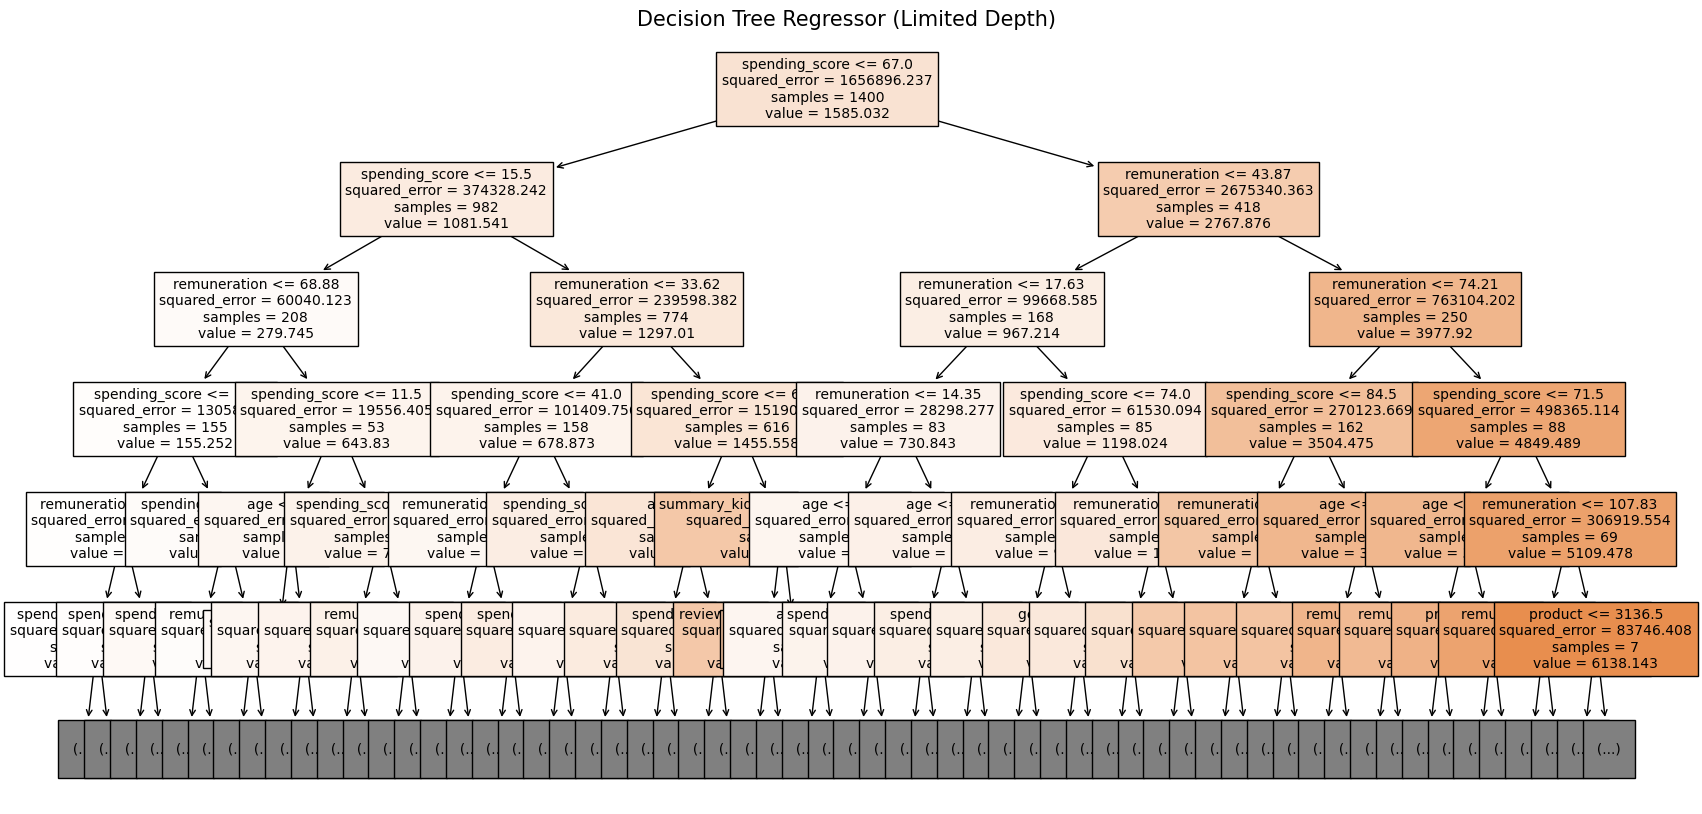

In [34]:
# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(regressor, filled=True, feature_names=X.columns, fontsize=10, max_depth=5)
plt.title("Decision Tree Regressor (Limited Depth)", fontsize=15)
plt.show()

In [24]:
# Applying pruning
regressor_pruned = DecisionTreeRegressor(random_state=42, max_depth=5, min_samples_split=5, min_samples_leaf=5)
regressor_pruned.fit(X_train, y_train)

# Predict using the test data
y_test_predicted = regressor_pruned.predict(X_test)

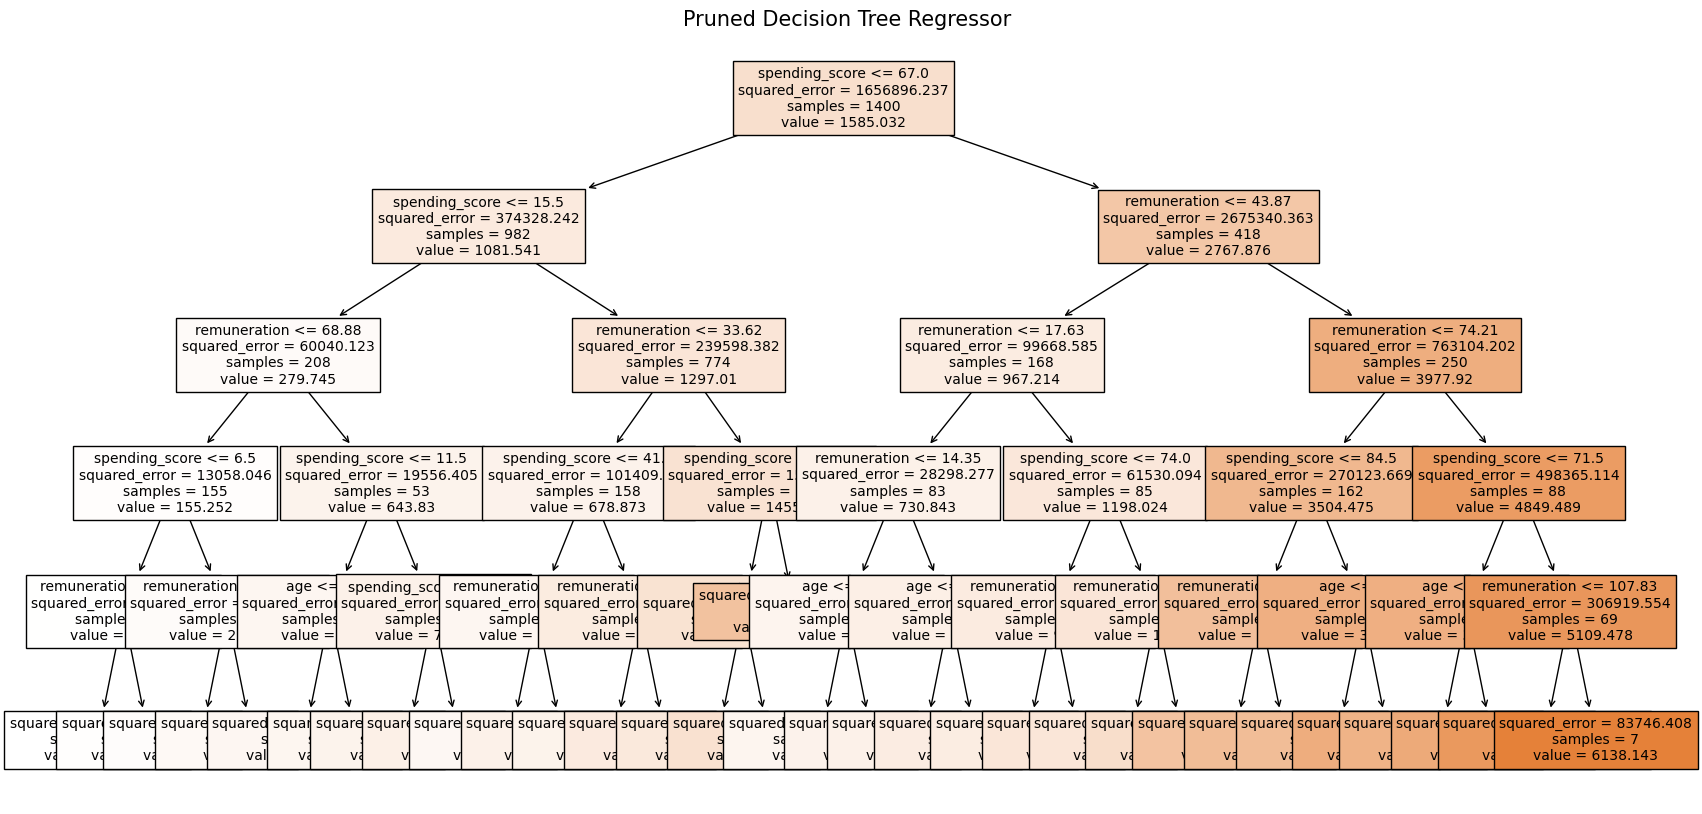

In [26]:
# Plot the pruned decision tree
plt.figure(figsize=(20, 10))
plot_tree(regressor_pruned, filled=True, feature_names=X.columns, fontsize=10)
plt.title("Pruned Decision Tree Regressor", fontsize=15)
plt.show()

# Assignment Activity 3

In [41]:
# Create a new DataFrame containing remuneration and spending_score columns
df3 = turtle_reviews[['remuneration', 'spending_score']]

   remuneration  spending_score
0         12.30              39
1         12.30              81
2         13.12               6
3         13.12              77
4         13.94              40
       remuneration  spending_score
count   2000.000000     2000.000000
mean      48.079060       50.000000
std       23.123984       26.094702
min       12.300000        1.000000
25%       30.340000       32.000000
50%       47.150000       50.000000
75%       63.960000       73.000000
max      112.340000       99.000000


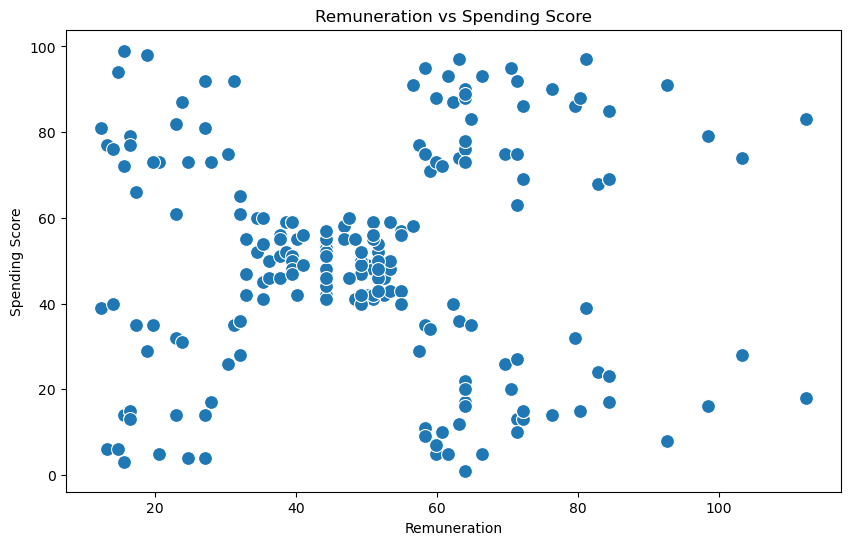

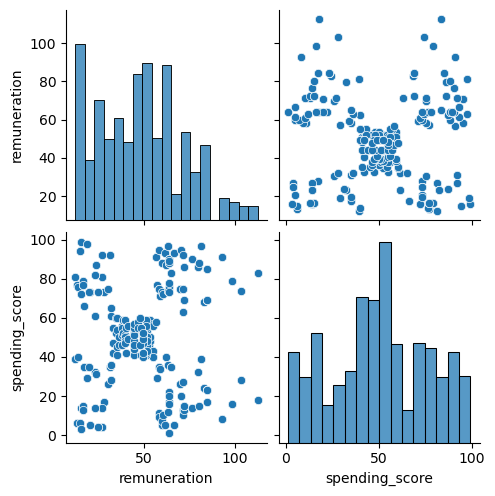

In [45]:
import seaborn as sns

# Explore the new DataFrame
print(df3.head())
print(df3.describe())

# Plot remuneration versus spending score to determine any correlations and possible groups
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df3, x='remuneration', y='spending_score', s=100)
plt.title('Remuneration vs Spending Score')
plt.xlabel('Remuneration')
plt.ylabel('Spending Score')
plt.show()

sns.pairplot(df3)
plt.show()

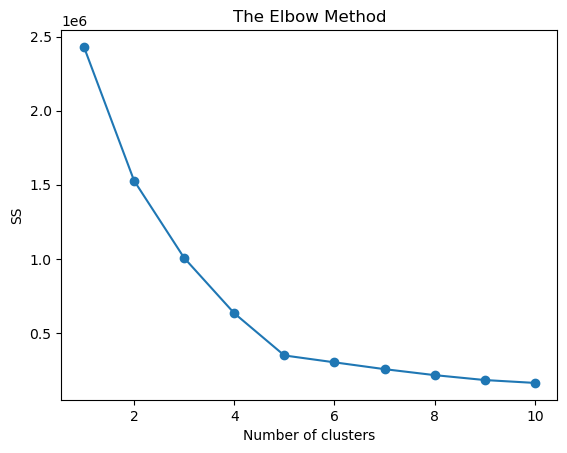

In [43]:
# Elbow Method
from sklearn.cluster import KMeans 

# Elbow chart for us to decide on the number of optimal clusters.
ss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i,
                    init = 'k-means++', 
                    max_iter = 500,
                    n_init = 10,
                    random_state = 42)
    kmeans.fit(df3)
    ss.append(kmeans.inertia_)

plt.plot(range(1, 11),
         ss,
         marker='o')

plt.title("The Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("SS")

plt.show()

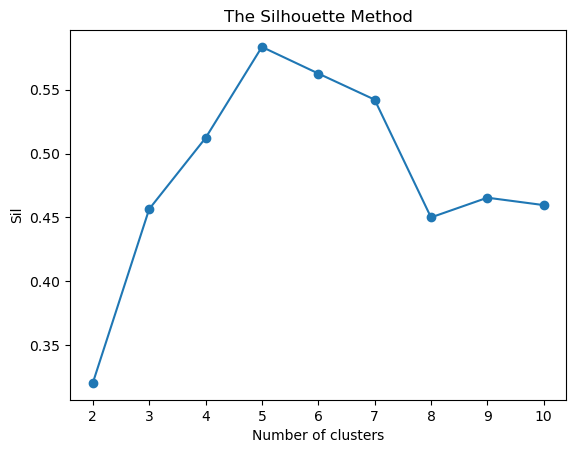

In [46]:
# Silhouette Method
from sklearn.metrics import silhouette_score

# Find the range of clusters to be used using silhouette method.
sil = []
kmax = 10

for k in range(2, kmax+1):
    kmeans_s = KMeans(n_clusters = k).fit(df3)
    labels = kmeans_s.labels_
    sil.append(silhouette_score(df3,
                                labels,
                                metric = 'euclidean'))

# Plot the silhouette method.
plt.plot(range(2, kmax+1),
         sil,
         marker='o')

plt.title("The Silhouette Method")
plt.xlabel("Number of clusters")
plt.ylabel("Sil")

plt.show()

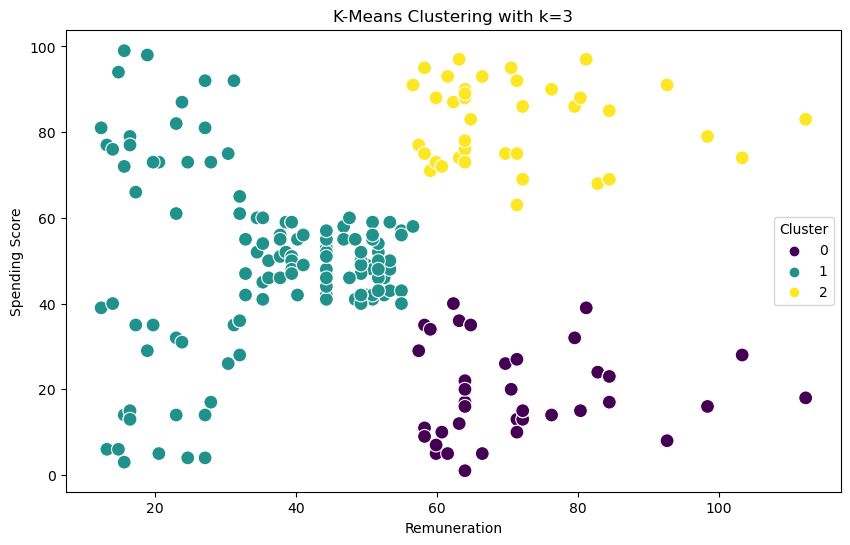

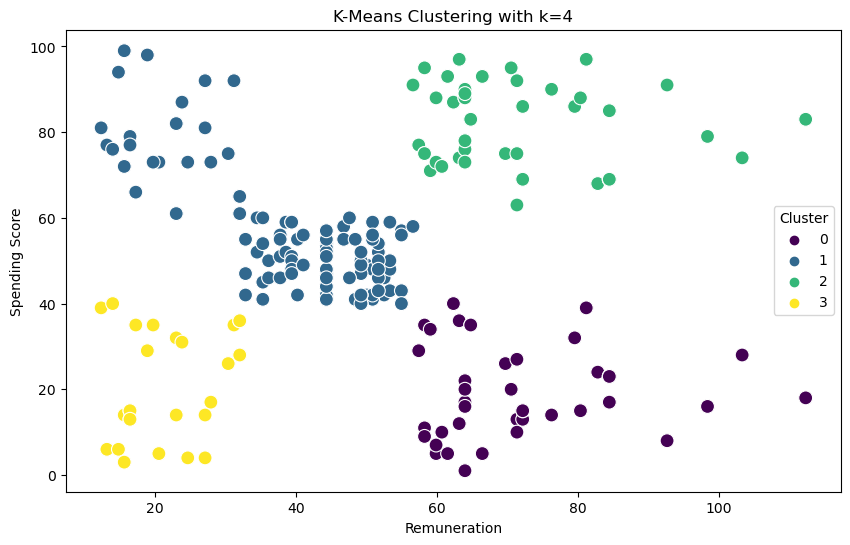

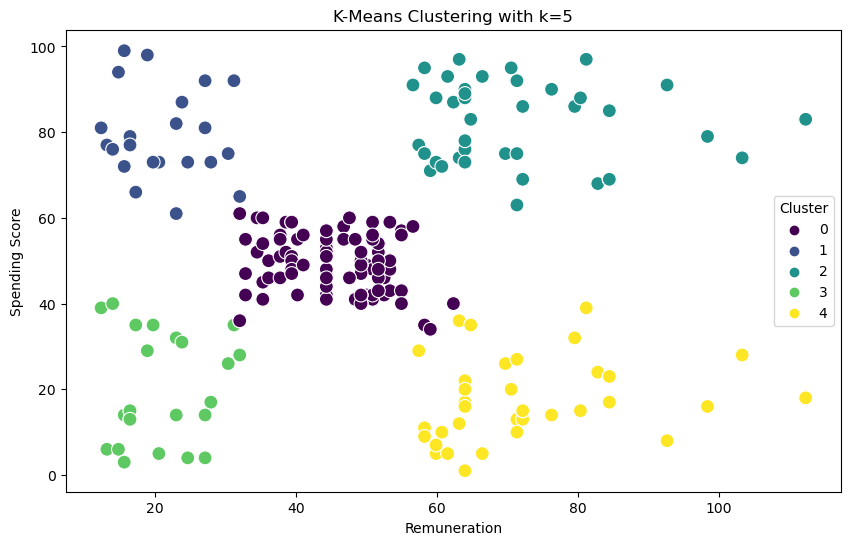

In [47]:
# Based on the Elbow and Silhouette methods, evaluate k=3, k=4, and k=5
k_values = [3, 4, 5]
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df3)
    df3[f'cluster_{k}'] = kmeans.labels_

    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df3, x='remuneration', y='spending_score', hue=f'cluster_{k}', palette='viridis', s=100)
    plt.title(f'K-Means Clustering with k={k}')
    plt.xlabel('Remuneration')
    plt.ylabel('Spending Score')
    plt.legend(title='Cluster')
    plt.show()

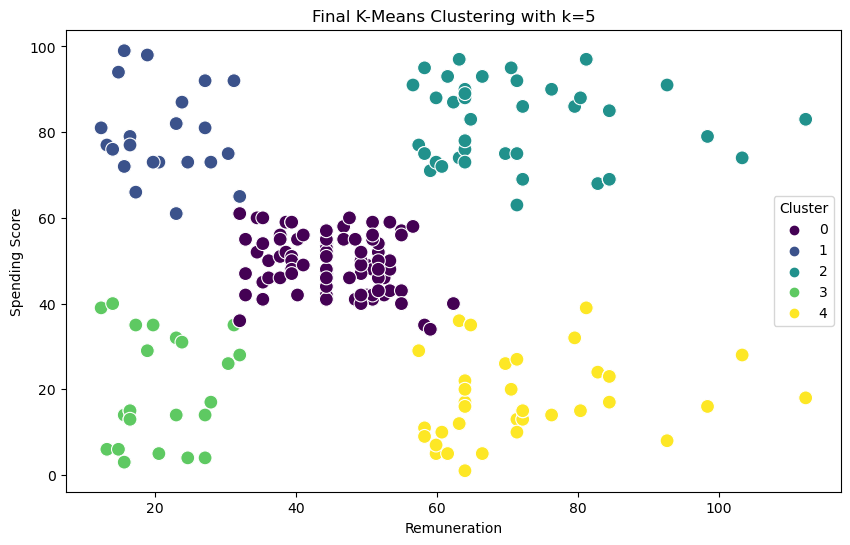

final_cluster
0    774
2    356
4    330
3    271
1    269
Name: count, dtype: int64


In [48]:
# Fit the final model using k=4
final_k = 5
final_kmeans = KMeans(n_clusters=final_k, random_state=42)
final_kmeans.fit(df3[['remuneration', 'spending_score']])
df3['final_cluster'] = final_kmeans.labels_

# Plot the final clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df3, x='remuneration', y='spending_score', hue='final_cluster', palette='viridis', s=100)
plt.title(f'Final K-Means Clustering with k={final_k}')
plt.xlabel('Remuneration')
plt.ylabel('Spending Score')
plt.legend(title='Cluster')
plt.show()

# Check the number of observations per predicted class
print(df3['final_cluster'].value_counts())

In [49]:
# Calculate the average remuneration and spending score
mean_remuneration = df3['remuneration'].mean()
mean_spending_score = df3['spending_score'].mean()

print(f"Mean Remuneration: {mean_remuneration}")
print(f"Mean Spending Score: {mean_spending_score}")

# Define the medium range around these averages
std_remuneration = df3['remuneration'].std()
std_spending_score = df3['spending_score'].std()

medium_remuneration_range = (mean_remuneration - std_remuneration, mean_remuneration + std_remuneration)
medium_spending_score_range = (mean_spending_score - std_spending_score, mean_spending_score + std_spending_score)

print(f"Medium Remuneration Range: {medium_remuneration_range}")
print(f"Medium Spending Score Range: {medium_spending_score_range}")

# Describe the groups identified
cluster_centers = final_kmeans.cluster_centers_
print(f'Cluster Centers:\n {cluster_centers}')

# Comment on the relative sizes of the groups
group_sizes = df3['final_cluster'].value_counts()
print(f'Group Sizes:\n {group_sizes}')

# Suggest specific actions per group or suggest groups that should be targeted
for i in range(final_k):
    cluster_remuneration, cluster_spending_score = cluster_centers[i]
    
    print(f'Cluster {i} has {group_sizes[i]} members. Centroid: {cluster_centers[i]}')
    
    if (medium_remuneration_range[0] <= cluster_remuneration <= medium_remuneration_range[1] and
        medium_spending_score_range[0] <= cluster_spending_score <= medium_spending_score_range[1]):
        print(f'Cluster {i} consists of medium remuneration and medium spending score customers. Consider offering balanced value programs.\n')
    elif cluster_remuneration > mean_remuneration and cluster_spending_score > mean_spending_score:
        print(f'Cluster {i} consists of high remuneration and high spending score customers. Consider offering premium loyalty programs.\n')
    elif cluster_remuneration < mean_remuneration and cluster_spending_score > mean_spending_score:
        print(f'Cluster {i} consists of low remuneration but high spending score customers. Consider offering discounts and promotions.\n')
    elif cluster_remuneration > mean_remuneration and cluster_spending_score < mean_spending_score:
        print(f'Cluster {i} consists of high remuneration but low spending score customers. Consider offering incentives to increase spending.\n')
    else:
        print(f'Cluster {i} consists of low remuneration and low spending score customers. Consider offering budget-friendly options and rewards.\n')

Mean Remuneration: 48.07906
Mean Spending Score: 50.0
Medium Remuneration Range: (24.95507554997869, 71.20304445002131)
Medium Spending Score Range: (23.905298109896584, 76.09470189010341)
Cluster Centers:
 [[44.41878553 49.52971576]
 [20.3536803  79.41635688]
 [73.2402809  82.00842697]
 [20.42435424 19.76383764]
 [74.83121212 17.42424242]]
Group Sizes:
 final_cluster
0    774
2    356
4    330
3    271
1    269
Name: count, dtype: int64
Cluster 0 has 774 members. Centroid: [44.41878553 49.52971576]
Cluster 0 consists of medium remuneration and medium spending score customers. Consider offering balanced value programs.

Cluster 1 has 269 members. Centroid: [20.3536803  79.41635688]
Cluster 1 consists of low remuneration but high spending score customers. Consider offering discounts and promotions.

Cluster 2 has 356 members. Centroid: [73.2402809  82.00842697]
Cluster 2 consists of high remuneration and high spending score customers. Consider offering premium loyalty programs.

Cluster

# Assignemnt activity 4

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords, words
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
import string
from wordcloud import WordCloud
from textblob import TextBlob

In [51]:
df = turtle_reviews.copy() 

# Display the first few rows of the dataframe
df.head()

,gender,age,remuneration,spending_score,loyalty_points,education,language,platform,product,review,summary
0,M,18,12.30,39,210,graduate,EN,Web,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,M,23,12.30,81,524,graduate,EN,Web,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,F,22,13.12,6,40,graduate,EN,Web,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,F,25,13.12,77,562,graduate,EN,Web,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,F,33,13.94,40,366,graduate,EN,Web,291,As my review of GF9's previous screens these w...,Money trap


In [52]:
# Retain only the review and summary columns
df = df[['review', 'summary']]

# Check for missing values
missing_values = df.isnull().sum()
print(f'Missing Values:\n{missing_values}')

Missing Values:
review     0
summary    0
dtype: int64


In [53]:
# Convert text to lowercase
df['review'] = df['review'].str.lower()
df['summary'] = df['summary'].str.lower()

# Replace punctuation
df['review'] = df['review'].str.replace('[{}]'.format(string.punctuation), ' ', regex=True)
df['summary'] = df['summary'].str.replace('[{}]'.format(string.punctuation), ' ', regex=True)

# Drop duplicates
df = df.drop_duplicates(subset=['review', 'summary'])

# Display the updated dataframe
df.head()

,review,summary
0,when it comes to a dm s screen the space on t...,the fact that 50 of this space is wasted on a...
1,an open letter to galeforce9 \n\nyour unpaint...,another worthless dungeon master s screen from...
2,nice art nice printing why two panels are f...,pretty but also pretty useless
3,amazing buy bought it as a gift for our new d...,five stars
4,as my review of gf9 s previous screens these w...,money trap


In [54]:
# Create a copy of the dataframe
df_copy = df.copy()

# Tokenize the columns
df_copy['review_tokens'] = df_copy['review'].apply(word_tokenize)
df_copy['summary_tokens'] = df_copy['summary'].apply(word_tokenize)

# Display the updated dataframe
df_copy.head()

,review,summary,review_tokens,summary_tokens
0,when it comes to a dm s screen the space on t...,the fact that 50 of this space is wasted on a...,"[when, it, comes, to, a, dm, s, screen, the, s...","[the, fact, that, 50, of, this, space, is, was..."
1,an open letter to galeforce9 \n\nyour unpaint...,another worthless dungeon master s screen from...,"[an, open, letter, to, galeforce9, your, unpai...","[another, worthless, dungeon, master, s, scree..."
2,nice art nice printing why two panels are f...,pretty but also pretty useless,"[nice, art, nice, printing, why, two, panels, ...","[pretty, but, also, pretty, useless]"
3,amazing buy bought it as a gift for our new d...,five stars,"[amazing, buy, bought, it, as, a, gift, for, o...","[five, stars]"
4,as my review of gf9 s previous screens these w...,money trap,"[as, my, review, of, gf9, s, previous, screens...","[money, trap]"


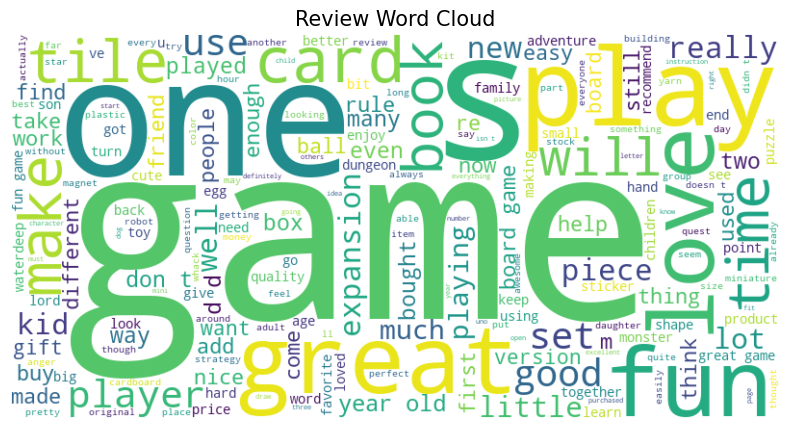

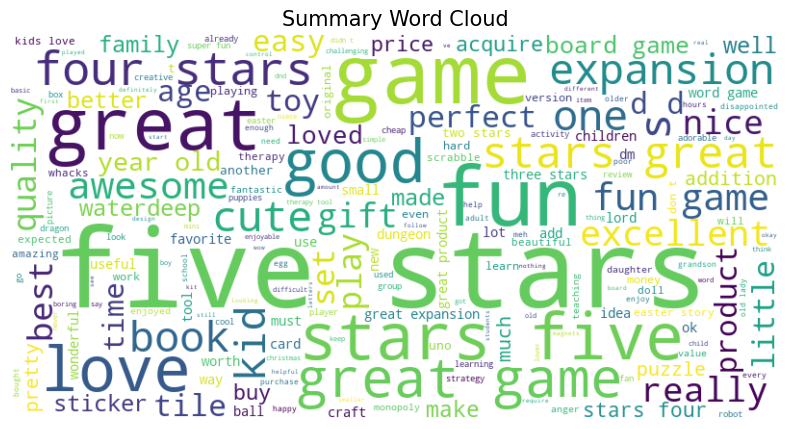

In [55]:
# Function to generate and plot a word cloud
def plot_word_cloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title, fontsize=15)
    plt.axis('off')
    plt.show()

# Join the tokens for word cloud generation
review_text = ' '.join(df_copy['review_tokens'].apply(lambda x: ' '.join(x)))
summary_text = ' '.join(df_copy['summary_tokens'].apply(lambda x: ' '.join(x)))

# Plot word clouds
plot_word_cloud(review_text, 'Review Word Cloud')
plot_word_cloud(summary_text, 'Summary Word Cloud')

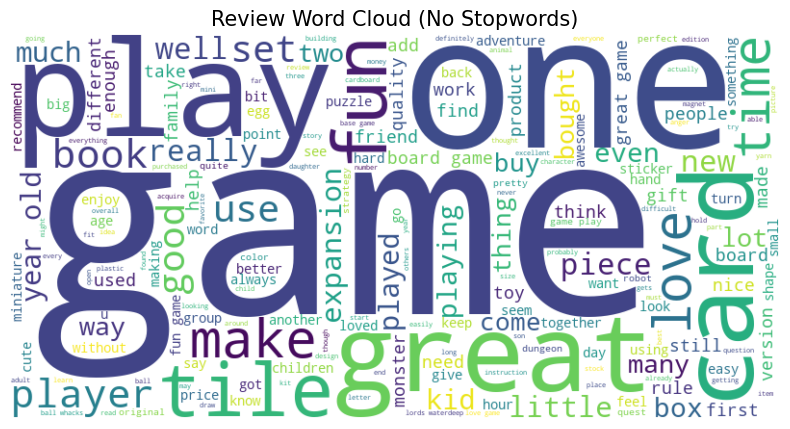

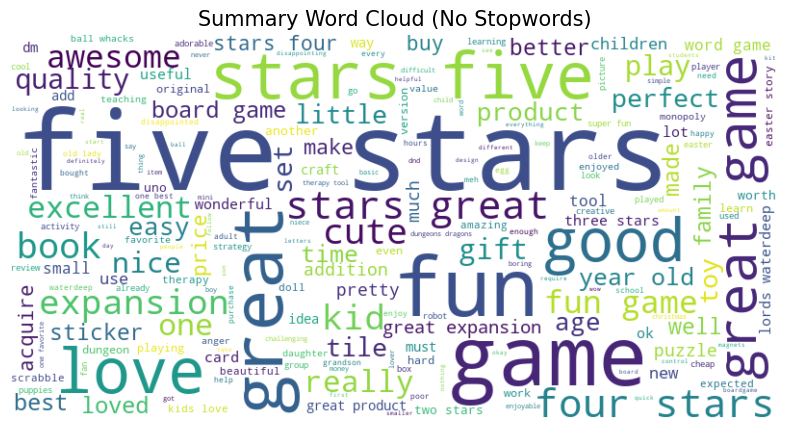

In [56]:
stop_words = set(stopwords.words('english'))

# Function to remove stopwords
def remove_stopwords(tokens):
    return [word for word in tokens if word not in stop_words and word.isalpha()]

# Remove stopwords
df_copy['review_tokens'] = df_copy['review_tokens'].apply(remove_stopwords)
df_copy['summary_tokens'] = df_copy['summary_tokens'].apply(remove_stopwords)

# Join the tokens for word cloud generation
review_text_no_stop = ' '.join(df_copy['review_tokens'].apply(lambda x: ' '.join(x)))
summary_text_no_stop = ' '.join(df_copy['summary_tokens'].apply(lambda x: ' '.join(x)))

# Plot word clouds without stopwords
plot_word_cloud(review_text_no_stop, 'Review Word Cloud (No Stopwords)')
plot_word_cloud(summary_text_no_stop, 'Summary Word Cloud (No Stopwords)')

In [57]:
def get_common_words(tokens):
    # Flatten the list of token lists into a single list of tokens
    all_words = [word for sublist in tokens for word in sublist]
    # Convert the list of tokens into a single space-separated string, then split into individual words
    freq_dist = pd.Series(all_words).value_counts().head(15)
    return freq_dist

# Get the 15 most common words
common_review_words = get_common_words(df_copy['review_tokens'])
common_summary_words = get_common_words(df_copy['summary_tokens'])

print(f'15 Most Common Words in Reviews:\n{common_review_words}')
print(f'15 Most Common Words in Summaries:\n{common_summary_words}')

15 Most Common Words in Reviews:
game      1706
great      587
fun        558
one        540
play       509
like       421
love       325
get        320
really     319
cards      306
tiles      300
time       297
good       292
would      283
book       278
Name: count, dtype: int64
15 Most Common Words in Summaries:
stars        439
five         354
game         319
great        296
fun          218
love          93
good          93
four          58
like          54
expansion     53
kids          51
cute          45
book          43
one           39
old           37
Name: count, dtype: int64


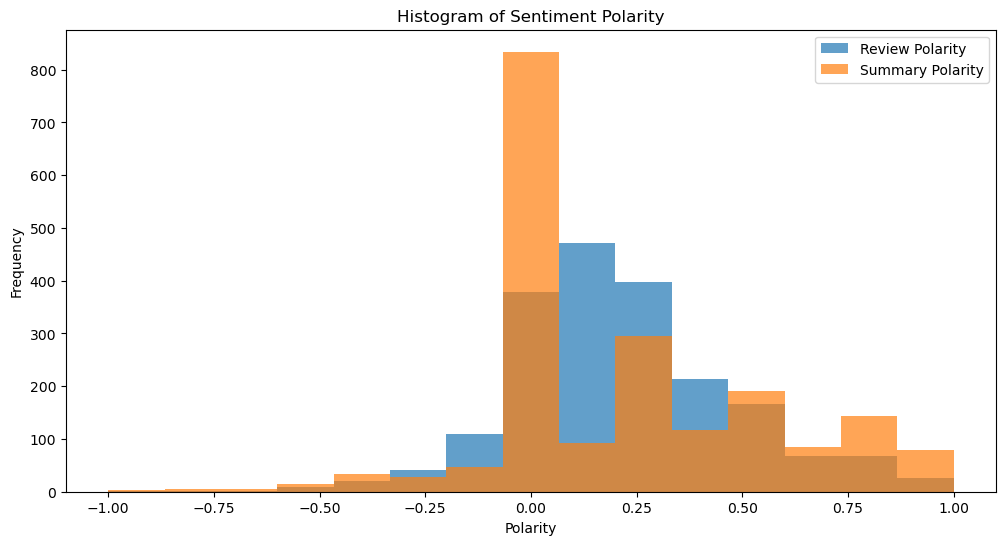

In [58]:
# Function to calculate polarity of text in a column
def get_polarity(column):
    return column.apply(lambda x: TextBlob(x).sentiment.polarity)

# Calculate polarity for reviews and summaries
df_copy['review_polarity'] = get_polarity(df_copy['review'])
df_copy['summary_polarity'] = get_polarity(df_copy['summary'])

# Plot histograms
plt.figure(figsize=(12, 6))
plt.hist(df_copy['review_polarity'], bins=15, alpha=0.7, label='Review Polarity')
plt.hist(df_copy['summary_polarity'], bins=15, alpha=0.7, label='Summary Polarity')
plt.title('Histogram of Sentiment Polarity')
plt.xlabel('Polarity')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [59]:
# Get the top 20 positive and negative reviews and summaries
top_20_positive_reviews = df_copy.nlargest(20, 'review_polarity')[['review', 'review_polarity']]
top_20_negative_reviews = df_copy.nsmallest(20, 'review_polarity')[['review', 'review_polarity']]

top_20_positive_summaries = df_copy.nlargest(20, 'summary_polarity')[['summary', 'summary_polarity']]
top_20_negative_summaries = df_copy.nsmallest(20, 'summary_polarity')[['summary', 'summary_polarity']]

print("Top 20 Positive Reviews:")
print(top_20_positive_reviews)

print("\nTop 20 Negative Reviews:")
print(top_20_negative_reviews)

print("\nTop 20 Positive Summaries:")
print(top_20_positive_summaries)

print("\nTop 20 Negative Summaries:")
print(top_20_negative_summaries)

Top 20 Positive Reviews:
                                                 review  review_polarity
7                            came in perfect condition               1.0
165                                        awesome book              1.0
194                                        awesome gift              1.0
496   excellent activity for teaching self managemen...              1.0
524                      perfect  just what i ordered                1.0
591                                   wonderful product              1.0
609                                 delightful product               1.0
621   wonderful for my grandson to learn the resurre...              1.0
790                                            perfect               1.0
933                                             awesome              1.0
1135                                       awesome set               1.0
1168             best set  buy 2 if you have the means               1.0
1177              awesome 